# TASK 1 - Prediction using Supervised ML



### To Predict the percentage of marks of the students based on the number of hours they studied


## Name:Nishad Govind Marathe



## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv ('student_data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## SEPERATING DEPENDENT AND INDEPENDENT VARIABLES


In [7]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

## Splitting the dataset into the Training set and Test

In [8]:
# Spliting the Data in two
X_train, val_X, y_train, val_y = train_test_split(X, y, test_size=0.3,random_state=0)


In [9]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

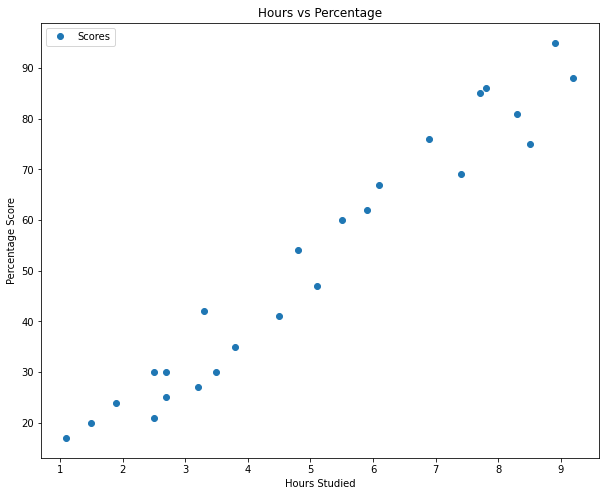

In [19]:
df.plot(x='Hours', y='Scores', style='o', figsize=(10,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## FITTING DATA INTO THE MODEL

In [10]:
y_pred = regression.predict(val_X)
print(y_pred)


[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [11]:
pred = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [i for i in y_pred]})
pred

,Hours,Predicted Marks
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


## COMPARING ACTUAL MARKS TO PREDICTED MARKS


In [12]:
compare= pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': y_pred})
compare



,Actual Marks,Predicted Marks
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Visually Comparing the Predicted Marks with the Actual Marks

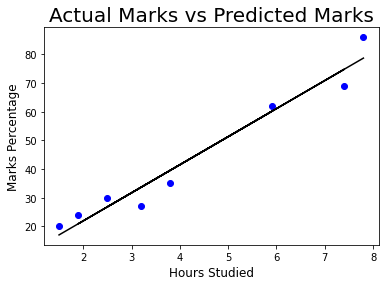

In [13]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, y_pred, color='Black')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## EVALUATION OF MODEL


In [14]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,y_pred))


Mean absolute error:  4.419727808027652


In [15]:
from sklearn import metrics
print('Root mean squared error:' ,np.sqrt(metrics.mean_squared_error(val_y,y_pred)))
print("R2 SCORE: ",metrics.r2_score(val_y,y_pred))

Root mean squared error: 4.792191274636315
R2 SCORE:  0.9568211104435257


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [16]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.915


## According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.915 marks.